In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# modelo 


In [107]:
data = pd.read_csv('base.csv')

In [108]:
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [109]:
data = data.drop_duplicates()

In [110]:
data.shape

(39404, 20)

#### Extraccion de muestra para posterior testeo

In [214]:
data_f01 = data.sample(frac=0.10,random_state=1)

In [112]:
data_f01

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
39523,29,technician,married,university.degree,no,no,no,cellular,apr,mon,3,999,1,failure,-1.8,93.749,-34.6,0.645,5008.7,no
34335,31,admin.,single,high.school,no,yes,no,cellular,may,thu,1,999,0,nonexistent,-1.8,92.893,-46.2,1.266,5099.1,no
8258,40,admin.,married,high.school,no,yes,no,telephone,jun,tue,3,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
40669,83,retired,divorced,basic.4y,no,yes,no,cellular,sep,thu,3,999,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no
34141,33,blue-collar,married,basic.6y,unknown,no,no,cellular,may,wed,2,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12681,48,blue-collar,married,basic.6y,no,yes,no,cellular,jul,mon,5,999,0,nonexistent,1.4,93.918,-42.7,4.960,5228.1,no
23095,40,admin.,single,high.school,no,yes,no,cellular,aug,tue,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
23543,37,technician,single,professional.course,no,yes,no,cellular,aug,thu,12,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,no
36612,25,student,single,university.degree,no,no,yes,cellular,jun,thu,1,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes


In [113]:
# extraigo la muestra del data set para modelar
data_model = data.drop(data_f01.index)

In [114]:
# hago una copia de base
data_copy = data_model.copy() 

### Encoding
#### Se transforma las variables nominales mediante One-Hot Encoding.  

In [115]:
# Reemplazo los valores del Target por NO:0 , SI:1
data_copy['y'].replace({"yes":1, "no":0},inplace=True)

In [116]:
columnas_categoricas = data_copy.select_dtypes(include=['object'])

In [117]:
# Se utiliza el metodo de One-hot en vez de LabelEncore para no generar columnas con datos ordinales
data_onehot = pd.get_dummies(data_copy,columns=columnas_categoricas.columns,drop_first=True,dtype=int)

In [118]:
data_onehot.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'

### Train Test split

In [119]:
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler

In [120]:
# Separo la base
X = data_onehot.drop(columns='y')
y = data_onehot['y']

In [121]:
#obtengo las base de entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=0) 

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [123]:
#Defino los parametros para buscar el optimo
param_grid = {'C':[0.001,0.01,0.1,1,10,100]}

# Defino los parametros para cross validation
skf =  StratifiedKFold(n_splits = 6, shuffle=True,random_state=42)


# modelo de regresion

model_rl = LogisticRegression(penalty=None,max_iter=1000)


#busco mejor estimador
grid_search = GridSearchCV(estimator=model_rl, param_grid=param_grid, cv=skf, scoring='roc_auc')

In [124]:
grid_search.fit(X_train,y_train)

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None wil

GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000, penalty=None),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='roc_auc')

In [125]:
grid_search.best_params_


{'C': 0.001}

In [126]:
fit_lr = grid_search.fit(X_train,y_train) 

c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None wil

In [127]:
# Se obtienen los valores predichos por el modelo
y_pred_test = grid_search.decision_function(X_test)

In [128]:
roc_auc = roc_auc_score(y_test,y_pred_test)

In [129]:
roc_auc

0.7799794700153353

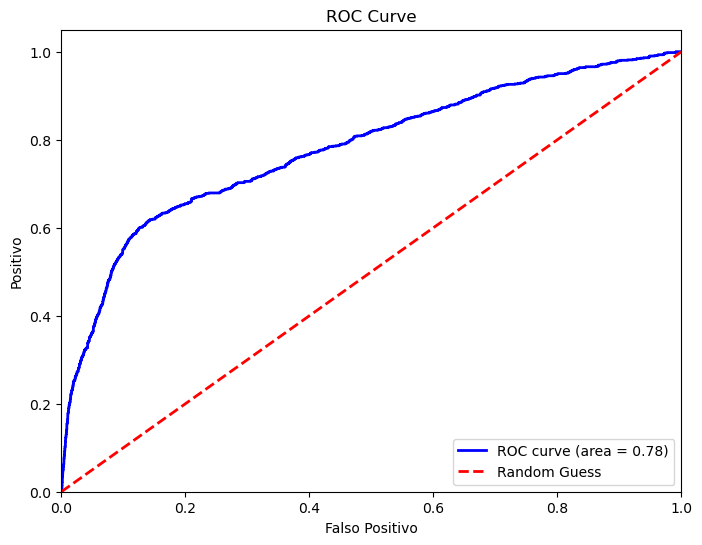

In [130]:
# grafico de la curva
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Positivo')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [131]:
feature_names = X.columns
feature_importance = grid_search.best_estimator_.coef_[0]
importance = pd.DataFrame({'feature_names': feature_names, 'feature_importance': feature_importance})
importance.sort_values(by = 'feature_importance', axis=0, ascending=False, inplace=True)
importance.head(10)

,feature_names,feature_importance
5,cons.price.idx,0.322200
39,month_jul,0.261702
50,poutcome_nonexistent,0.235794
41,month_mar,0.163437
28,education_university.degree,0.156758
47,day_of_week_thu,0.106688
21,marital_single,0.097217
37,month_aug,0.078932
13,job_retired,0.076838
16,job_student,0.072816


<Axes: title={'center': 'Feature Importance'}>

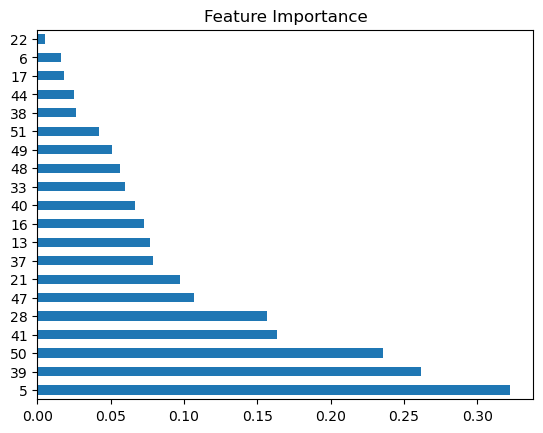

In [132]:
f_importances = pd.Series(feature_importance)
f_importances.nlargest(20).plot(kind='barh',title = 'Feature Importance')

In [133]:
import statsmodels.api as sm

logit_model=sm.OLS(y,X.astype(float))
result=logit_model.fit()
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.300     
Dependent Variable:     y                AIC:                         11519.9861
Date:                   2024-03-10 21:24 BIC:                         11952.2761
No. Observations:       35464            Log-Likelihood:              -5709.0   
Df Model:               51               F-statistic:                 299.5     
Df Residuals:           35413            Prob (F-statistic):          0.00      
R-squared (uncentered): 0.301            Scale:                       0.080905  
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------------------
age                              0.0001   0.0002   0.6481 0.5170 -0.0002  0.0005
campaign                        -0.0024   0.0005  -4.3181 0.0000 -0.0034 -0.0013
pdays                           -0.0002   0.0000  -6.5799 0.0000 -0.0002 -0.0001
previous                        -0.0009   0.0074  -0.1256 0.9001 -0.0154  0.0136
emp.var.rate                    -0.1271   0.0092 -13.8328 0.0000 -0.1451 -0.1090
cons.price.idx                   0.0981   0.0040  24.2714 0.0000  0.0902  0.1060
cons.conf.idx                    0.0010   0.0007   1.3199 0.1869 -0.0005  0.0024
euribor3m                        0.1147   0.0104  11.0007 0.0000  0.0942  0.1351
nr.employed                     -0.0018   0.0001 -21.7852 0.0000 -0.0020 -0.0016
job_blue-collar                 -0.0100   0.0056  -1.7742 0.0760 -0.0209  0.0010
job_entrepreneur                -0.0082   0.0087  -0.9438 0.3453 -0.0253  0.0088
job_housemaid                   -0.0107   0.0103  -1.0464 0.2954 -0.0309  0.0094
job_management                  -0.0096   0.0066  -1.4575 0.1450 -0.0224  0.0033
job_retired                      0.0244   0.0092   2.6626 0.0078  0.0064  0.0424
job_self-employed               -0.0052   0.0087  -0.5944 0.5522 -0.0224  0.0119
job_services                    -0.0090   0.0061  -1.4775 0.1395 -0.0210  0.0029
job_student                      0.0293   0.0113   2.5860 0.0097  0.0071  0.0516
job_technician                  -0.0017   0.0054  -0.3101 0.7565 -0.0123  0.0090
job_unemployed                  -0.0034   0.0101  -0.3428 0.7317 -0.0231  0.0163
job_unknown                     -0.0192   0.0172  -1.1169 0.2640 -0.0528  0.0145
marital_married                  0.0045   0.0049   0.9166 0.3594 -0.0052  0.0142
marital_single                   0.0094   0.0057   1.6465 0.0997 -0.0018  0.0206
marital_unknown                  0.0303   0.0328   0.9240 0.3555 -0.0340  0.0947
education_basic.6y               0.0043   0.0081   0.5339 0.5934 -0.0115  0.0202
education_basic.9y              -0.0041   0.0064  -0.6377 0.5237 -0.0167  0.0085
education_high.school           -0.0005   0.0066  -0.0805 0.9358 -0.0135  0.0125
education_illiterate             0.1025   0.0692   1.4810 0.1386 -0.0332  0.2381
education_professional.course   -0.0015   0.0075  -0.2011 0.8406 -0.0161  0.0131
education_university.degree      0.0055   0.0068   0.8184 0.4131 -0.0077  0.0188
education_unknown                0.0027   0.0091   0.2953 0.7678 -0.0151  0.0204
default_unknown                 -0.0141   0.0040  -3.5365 0.0004 -0.0219 -0.0063
default_yes                     -0.0498   0.1643  -0.3029 0.7620 -0.3719  0.2723
housing_unknown                 -0.0028   0.0049  -0.5657 0.5716 -0.0124  0.0068
housing_yes                      0.0001   0.0031   0.0218 0.9826 -0.0060  0.0061
loan_unknown                    -0.0028   0.0049  -0.5657 0.5716 -0.0124  0.0068
loan_yes                        -0.0067   0.0042  -1.6018 0.1092 -0.0149  0.0015
contact_telephone               -0.0582   0.0056 -10.3809 0.0000 -0.0692 -0.0472
month_a

### Modelo de Redes Neuronales

In [135]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import roc_auc_score

In [136]:
X_train.shape[1]

52

In [147]:
model_nn = Sequential([
    Dense(64, activation='relu',input_shape=(52,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [148]:
X_train_np = np.array(X_train)
y_train_np =np.array(y_train) 

In [149]:
model_nn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['AUC'])

model_nn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


665/665 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - AUC: 0.5341 - loss: 40.8932 - val_AUC: 0.6088 - val_loss: 0.8846
Epoch 2/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6111 - loss: 0.8858 - val_AUC: 0.6081 - val_loss: 0.8136
Epoch 3/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6273 - loss: 0.9004 - val_AUC: 0.7827 - val_loss: 0.3703
Epoch 4/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6496 - loss: 0.6657 - val_AUC: 0.5000 - val_loss: 1.3802
Epoch 5/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - AUC: 0.6295 - loss: 0.8246 - val_AUC: 0.7608 - val_loss: 0.4987
Epoch 6/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6316 - loss: 0.7889 - val_AUC: 0.5724 - val_loss: 0.9221
Epoch 7/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6550 - loss: 0.6405 - val_AUC: 0.7919 - val_loss: 0.3857
Epoch 8/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6810 - loss: 0.5302 - val_AUC: 0.7932 - val_loss: 0.3763
Epoch 9/10
665/665 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - AUC: 0.6467 

In [150]:
# Prediccion de datos de test
y_pred_test_nn = model_nn.predict(X_test)

roc_auc_nn = roc_auc_score(y_test, y_pred_test_nn)

print("ROC AUC for Neural Network:", roc_auc_nn)

278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step
ROC AUC for Neural Network: 0.7796073173842311


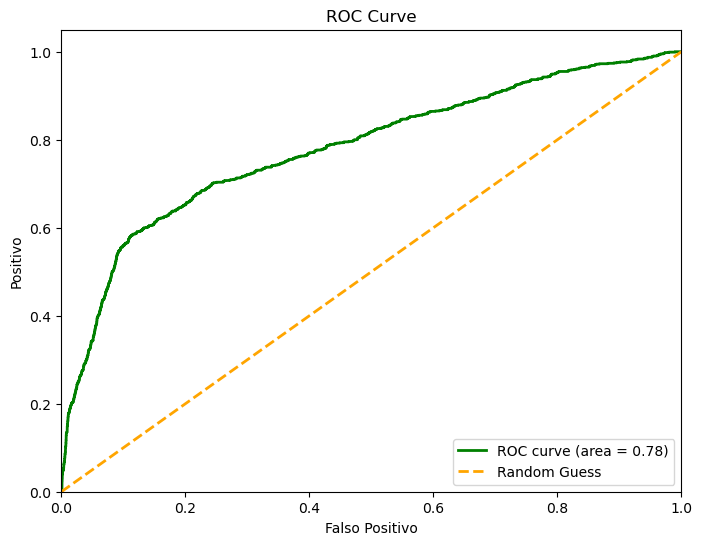

In [152]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_nn)

roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falso Positivo')
plt.ylabel('Positivo')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Pipeline Model Logist Regresion

In [134]:
# creacion de Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline


In [215]:
# Armo la clase para poder transformar los valores de y a 0 y 1
class Replace(BaseEstimator, TransformerMixin):
    def __init__(self, columna, reemplazo):
        self.columna = columna
        self.reemplazo = reemplazo
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Replace values in the specified column
        X[self.columna].replace(self.reemplazo, inplace=True)
        return X



# Armo la clase para dropear la columna target
class FeatureSeleccion(BaseEstimator, TransformerMixin):
    def __init__(self,columna):
        self.columna = columna
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X.drop(columns=self.columna)


    


In [216]:
lista =['job','marital','education','default', 'housing','loan','contact','month','day_of_week','poutcome']


column_transformer = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'),lista)])

In [217]:
pipeline = Pipeline([
    ('reemplazo', Replace(columna='y', reemplazo={"yes": 1, "no": 0})),
    ('feature_selection', FeatureSeleccion(columna=['y'])),
    ('preprocessor', column_transformer),
    ('classifier', GridSearchCV(estimator=LogisticRegression(penalty=None, max_iter=1000),
                                param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                                cv=StratifiedKFold(n_splits=6, shuffle=True, random_state=42),
                                scoring='roc_auc'))
])

In [221]:
### Pruebo el pipeline con los datos que separé al inicio
pipeline.fit(data_f01,data_f01['y'])


c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\aleja\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None wil

Pipeline(steps=[('reemplazo',
                 Replace(columna='y', reemplazo={'no': 0, 'yes': 1})),
                ('feature_selection', FeatureSeleccion(columna=['y'])),
                ('preprocessor',
                 ColumnTransformer(transformers=[('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])])),
                ('classifier',
                 GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=42, shuffle=True),
                              estimator=LogisticRegression(max_iter=1000,
                                                           penalty=None),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
                              scoring='roc_auc'))])

In [223]:
y_pred_test = pipeline.predict_proba(data_f01)[:, 1]

# Calculate ROC AUC score
roc_auc = roc_auc_score(data_f01['y'], y_pred_test)

In [224]:
roc_auc

0.7787211213841283